## Importación de librerías

In [1]:
# Data processing  
# -----------------------------------------------------------------------  
import numpy as np
import pandas as pd

# Graphics
# -----------------------------------------------------------------------  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore") 

## Carga de datos

In [2]:
data = pd.read_csv('../data/output/autorenew_eda.csv')

In [3]:
data.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,unkonwn,1993,manually,NaN,150000,petrol,volkswagen,unkonwn
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manually,187.0,125000,diesel,audi,yes
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatic,161.0,125000,diesel,jeep,unkonwn
3,GOLF_4_1_4__3TÜRER,1500,small car,2001,manually,74.0,150000,petrol,volkswagen,no
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manually,68.0,90000,diesel,skoda,no


## Objetivo del análisis

* Averiguar qué marcas son las más vendidas, el rango de precios correspondiente y la antigüedad de los vehículos.

* Para evitar que vehículos que tengan daños puedan sesgar el conjunto de datos y las conclusiones que saquemos, nos centraremos en el subconjunto de datos de vehículos sin daños.

In [4]:
data.shape[0]

356305

In [5]:
data['notRepairedDamage'].value_counts()

notRepairedDamage
no         258639
unkonwn     64431
yes         33235
Name: count, dtype: int64

In [6]:
df = data[data['notRepairedDamage'] == 'no'].copy()

In [7]:
df.drop(columns='notRepairedDamage', inplace=True)

In [8]:
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand
3,GOLF_4_1_4__3TÜRER,1500,small car,2001,manually,74.0,150000,petrol,volkswagen
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manually,68.0,90000,diesel,skoda
6,Peugeot_206_CC_110_Platinum,2200,convertible,2004,manually,108.0,150000,petrol,peugeot
9,Mazda_3_1.6_Sport,2000,unkonwn,2004,manually,104.0,150000,petrol,mazda
12,VW_PASSAT_1.9_TDI_131_PS_LEDER,2500,combi,2004,manually,129.0,150000,unkonwn,volkswagen


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258639 entries, 3 to 356304
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   name                258639 non-null  object 
 1   price               258639 non-null  int64  
 2   vehicleType         258639 non-null  object 
 3   yearOfRegistration  258639 non-null  int64  
 4   gearbox             258639 non-null  object 
 5   powerCV             244019 non-null  float64
 6   kilometer           258639 non-null  int64  
 7   fuelType            258639 non-null  object 
 8   brand               258639 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 19.7+ MB


In [10]:
df.isna().mean().round(4) * 100


name                  0.00
price                 0.00
vehicleType           0.00
yearOfRegistration    0.00
gearbox               0.00
powerCV               5.65
kilometer             0.00
fuelType              0.00
brand                 0.00
dtype: float64

Como tenemos pocos nulos en `powerCV` vamos a eliminarlos.

In [11]:
df.dropna(inplace=True)

In [12]:
df.columns

Index(['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerCV', 'kilometer', 'fuelType', 'brand'],
      dtype='object')

### Columnas del dataset

- ``name``: Nombre del anuncio, normalmente incluye la marca y el modelo del coche.

- ``price``: Precio del coche en la moneda local (probablemente euros o dólares).

- ``vehicleType``: Tipo de vehículo (sedán, SUV, compacto, etc.).

- ``yearOfRegistration``: Año en el que se matriculó el coche.

- ``gearbox``: Tipo de transmisión (manual o automática).

- ``powerCV``: Potencia del coche en caballos de vapor (CV).

- ``kilometer``: Kilometraje total del coche.

- ``fuelType``: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- ``brand``: Marca del coche.

## EDA

### Duplicados

In [13]:
df.duplicated().sum()

np.int64(7919)

Vamos a dejarlos en este caso

### Identificar variables numéricas y categóricas

In [14]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Variables numéricas:\n\n", num_cols)
print("\nVariables categóricas:\n\n", cat_cols)

Variables numéricas:

 Index(['price', 'yearOfRegistration', 'powerCV', 'kilometer'], dtype='object')

Variables categóricas:

 Index(['name', 'vehicleType', 'gearbox', 'fuelType', 'brand'], dtype='object')


## Variables numéricas

### Estadísticas descriptivas

In [15]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,244019.0,7297.43,12443.90,101.0,1899.0,4300.0,9250.0,1250000.0
yearOfRegistration,244019.0,2004.11,6.78,1951.0,2000.0,2004.0,2009.0,2018.0
powerCV,244019.0,128.44,61.72,40.0,85.0,114.0,158.0,549.0
kilometer,244019.0,122825.89,40375.59,5000.0,100000.0,150000.0,150000.0,150000.0


### Visualizaciones

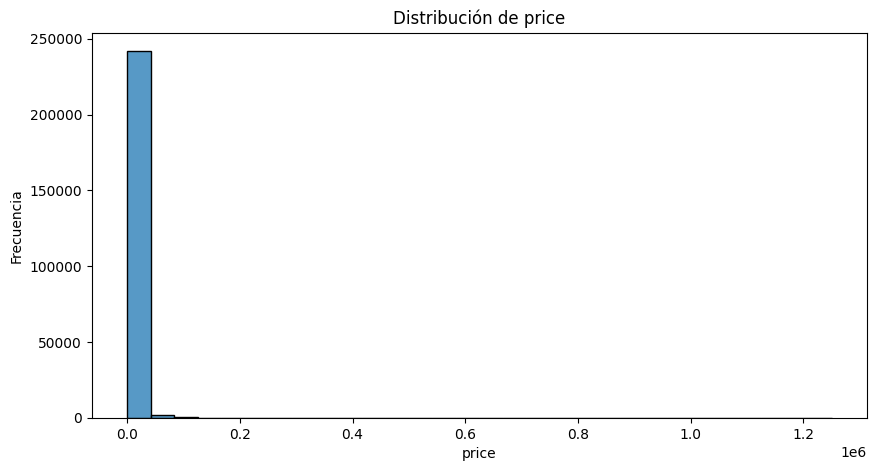

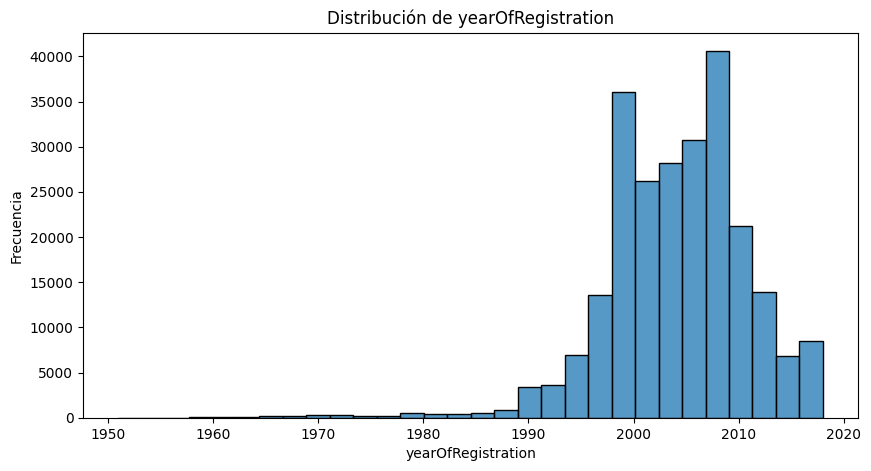

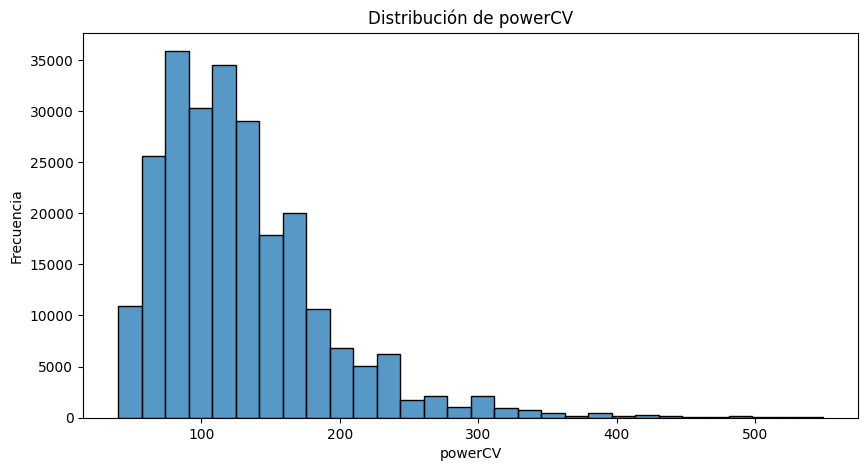

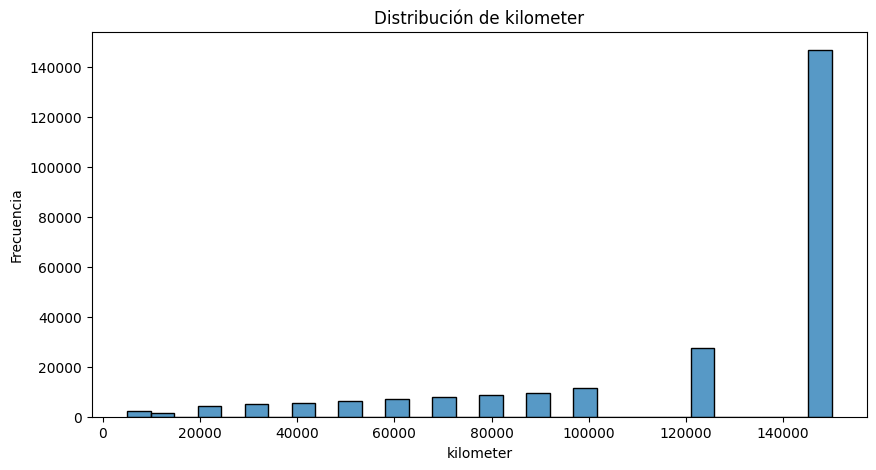

In [16]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30, edgecolor='black')

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.show()

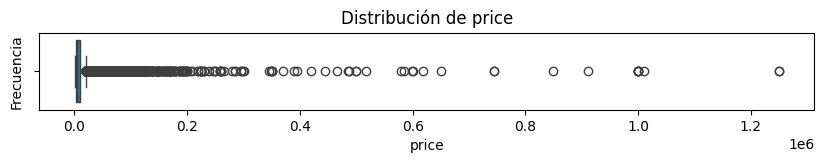

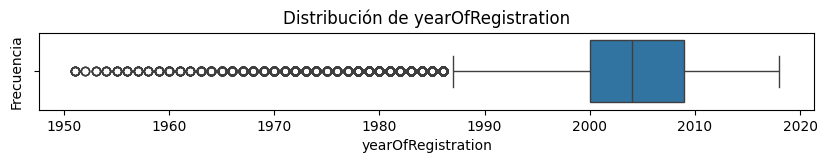

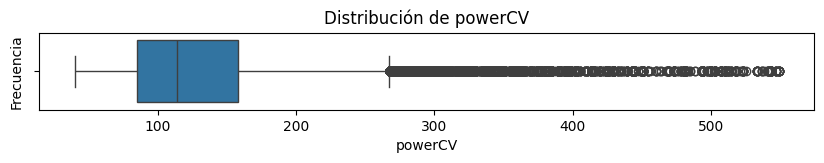

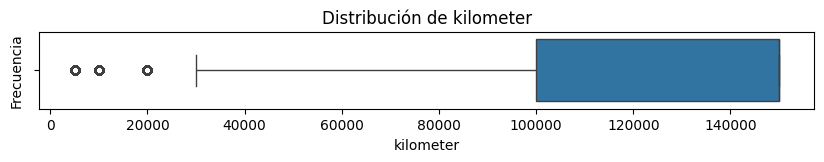

In [17]:
for col in num_cols:
    plt.figure(figsize=(10, 1))
    sns.boxplot(x=df[col])

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.show()

## Variables categóricas

### Estadísticas descriptivas

In [18]:
df.describe(include = "object").T

,count,unique,top,freq
name,244019,143227,BMW_318i,567
vehicleType,244019,8,unkonwn,78377
gearbox,244019,3,manually,184123
fuelType,244019,8,petrol,150318
brand,244019,40,volkswagen,51563


### Valores únicos y frecuencias

In [19]:
for col in cat_cols:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{col}' -----------\n")
    print(f"Valores únicos: {df[col].unique()}\n")
    print("Frecuencias de los valores únicos de las categorías:")
    display(df[col].value_counts())

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'name' -----------

Valores únicos: ['GOLF_4_1_4__3TÜRER' 'Skoda_Fabia_1.4_TDI_PD_Classic'
 'Peugeot_206_CC_110_Platinum' ...
 'Alfa_Romeo_159_Jtdm_1.9_150_ps_13_600_km_top_voll'
 'Smart_smart_leistungssteigerung_100ps'
 'BMW_M135i_vollausgestattet_NP_52.720____Euro']

Frecuencias de los valores únicos de las categorías:


name
BMW_318i                                        567
Volkswagen_Golf_1.4                             510
BMW_320i                                        458
BMW_316i                                        452
BMW_116i                                        364
                                               ... 
Verkaufe_Corsa_d                                  1
VW_Sharan_1_9_Diesel                              1
Audi_A6_4B_Avant_2.5_TDI_GRÜNE_PLAKETTE           1
Volkswagen_Liebhaber_GTI                          1
BMW_M135i_vollausgestattet_NP_52.720____Euro      1
Name: count, Length: 143227, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'vehicleType' -----------

Valores únicos: ['small car' 'convertible' 'unkonwn' 'combi' 'suv' 'bus' 'coupe' 'other']

Frecuencias de los valores únicos de las categorías:


vehicleType
unkonwn        78377
small car      51442
combi          47309
bus            22327
convertible    18054
coupe          13607
suv            11553
other           1350
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'gearbox' -----------

Valores únicos: ['manually' 'automatic' 'unkonwn']

Frecuencias de los valores únicos de las categorías:


gearbox
manually     184123
automatic     57291
unkonwn        2605
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'fuelType' -----------

Valores únicos: ['petrol' 'diesel' 'unkonwn' 'lpg' 'other' 'hybrid' 'cng' 'electro']

Frecuencias de los valores únicos de las categorías:


fuelType
petrol     150318
diesel      79891
unkonwn      9600
lpg          3495
cng           424
hybrid        220
electro        39
other          32
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'brand' -----------

Valores únicos: ['volkswagen' 'skoda' 'peugeot' 'mazda' 'nissan' 'renault' 'ford'
 'mercedes_benz' 'bmw' 'opel' 'seat' 'citroen' 'honda' 'fiat' 'mini'
 'smart' 'subaru' 'mitsubishi' 'audi' 'hyundai' 'alfa_romeo' 'kia'
 'lancia' 'porsche' 'toyota' 'chevrolet' 'dacia' 'suzuki' 'daihatsu'
 'other' 'chrysler' 'volvo' 'jaguar' 'daewoo' 'jeep' 'saab' 'land_rover'
 'rover' 'trabant' 'lada']

Frecuencias de los valores únicos de las categorías:


brand
volkswagen       51563
bmw              28848
mercedes_benz    25122
opel             24038
audi             23192
ford             15562
renault          10242
peugeot           7219
fiat              5446
seat              4768
skoda             4308
smart             3725
mazda             3694
toyota            3489
citroen           3288
nissan            3199
mini              2838
hyundai           2626
volvo             2284
porsche           1824
honda             1813
mitsubishi        1812
kia               1773
other             1745
suzuki            1533
alfa_romeo        1514
chevrolet         1225
chrysler           866
dacia              685
land_rover         582
jeep               563
subaru             472
daihatsu           444
jaguar             432
saab               373
daewoo             279
lancia             278
rover              225
lada               121
trabant              9
Name: count, dtype: int64

### Visualizaciones

Gráficos de barras para variables categóricas

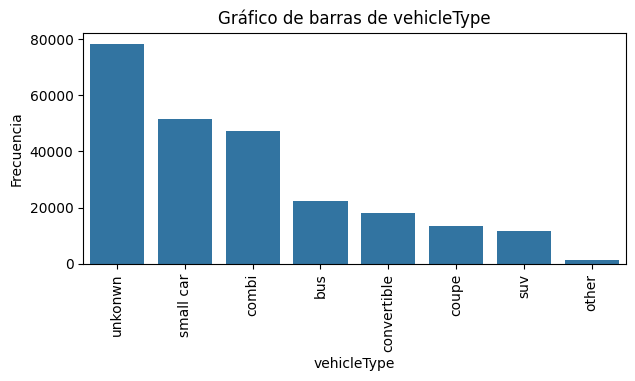

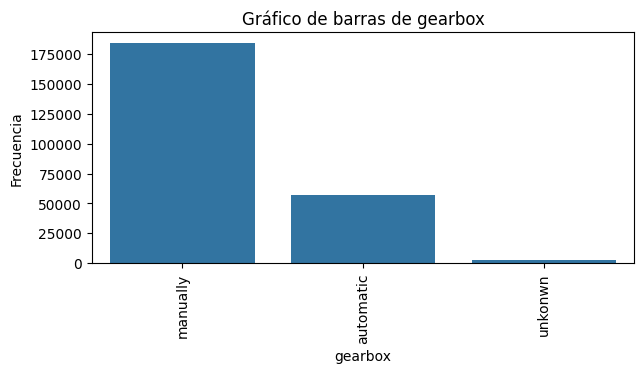

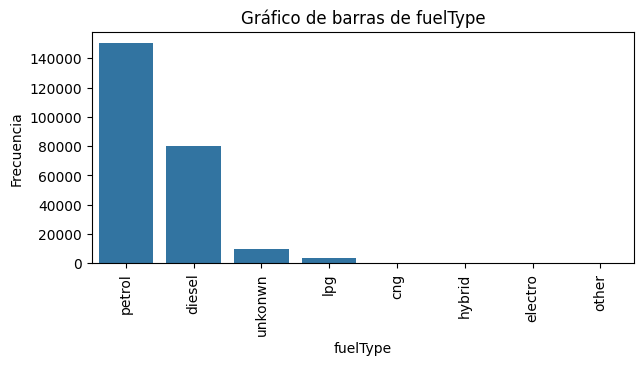

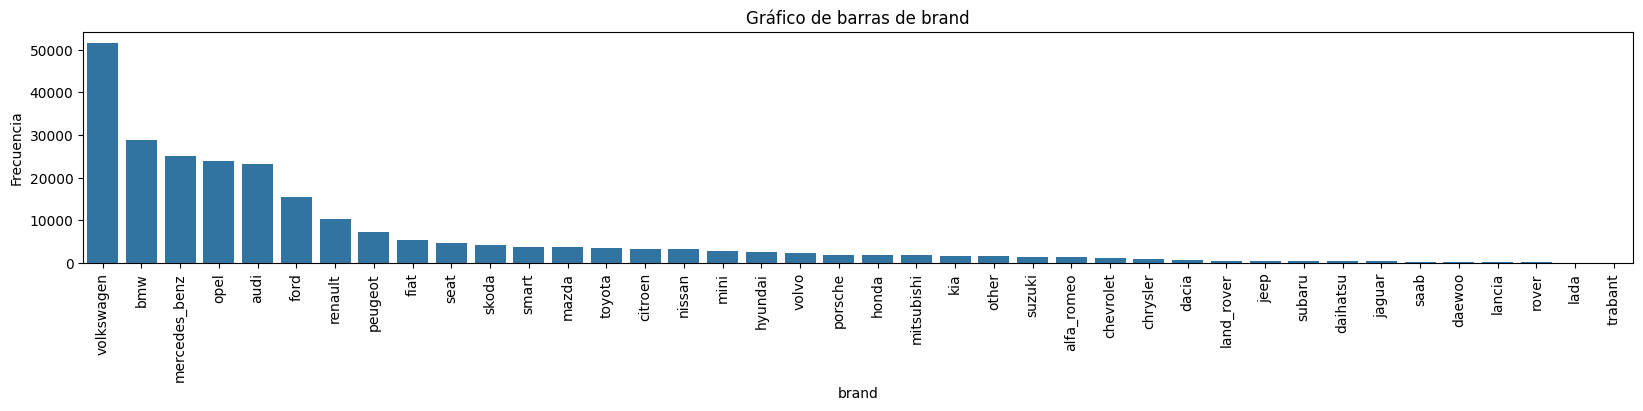

In [20]:
for col in cat_cols:

    if col == 'name':
        continue

    num_categories = df[col].nunique()
    width = max(7, num_categories * 0.5)
    height = 3

    plt.figure(figsize=(width, height))
    sns.countplot(x=df[col], order=df[col].value_counts().index)

    plt.title(f'Gráfico de barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)

    plt.show()


## Matriz de correlación

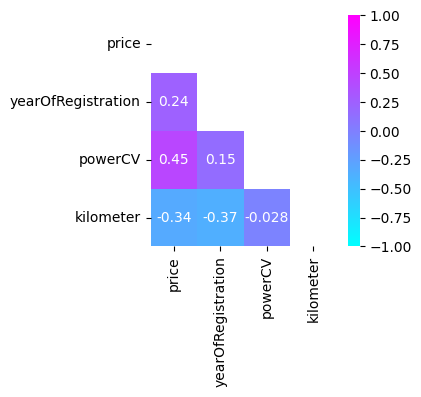

In [21]:
# Calcular la matriz de correlación
corr_matrix = df.corr(numeric_only=True)

# Crear la figura
plt.figure(figsize=(3, 3))

# Crear una máscara para mostrar solo la parte triangular
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Graficar el mapa de calor
sns.heatmap(corr_matrix, 
            annot=True, 
            vmin=-1, 
            vmax=1, 
            mask=mask,
            cmap='cool')

plt.show()

## Relaciones cruzadas

In [22]:
cat_cols

Index(['name', 'vehicleType', 'gearbox', 'fuelType', 'brand'], dtype='object')

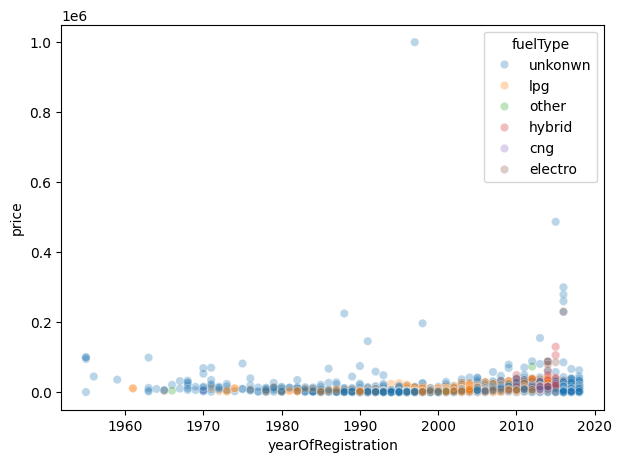

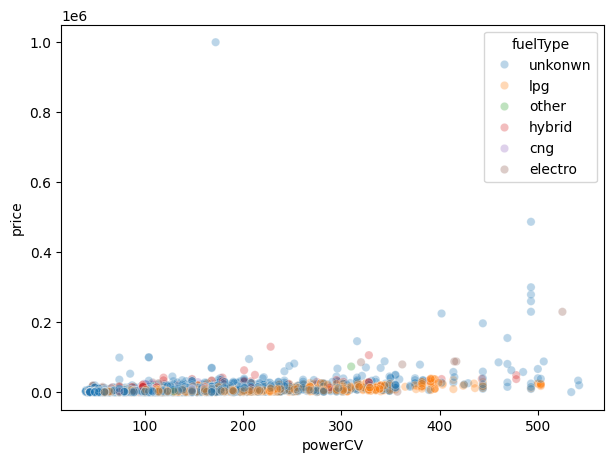

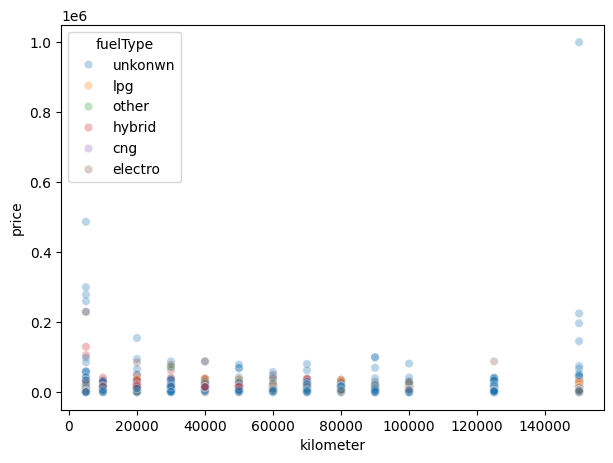

In [23]:
# Definir la variable objetivo
columna1 = 'price'
columna2 = 'fuelType'

# Definir DataFrame y variables numéricas
df_num = df.select_dtypes(include=np.number).drop(columns=[columna1], errors='ignore')
cols_num = df_num.columns

# Generar gráficos de dispersión
for col in cols_num:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=df[~df['fuelType'].isin(['petrol', 'diesel'])], x=col, y=columna1, hue=columna2, alpha=0.3)
    plt.xlabel(col)
    plt.ylabel(columna1)
    plt.show()

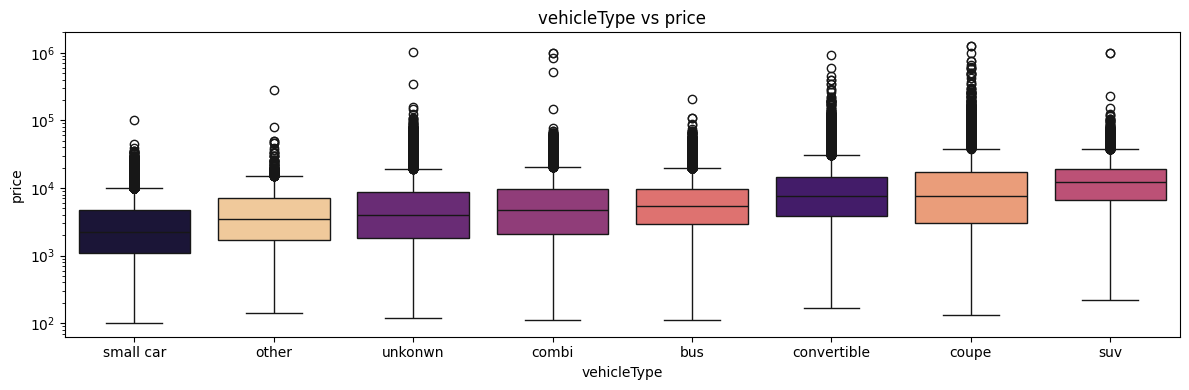

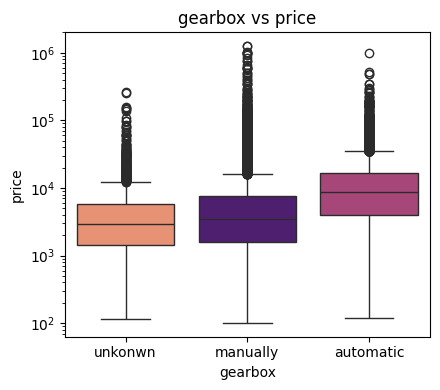

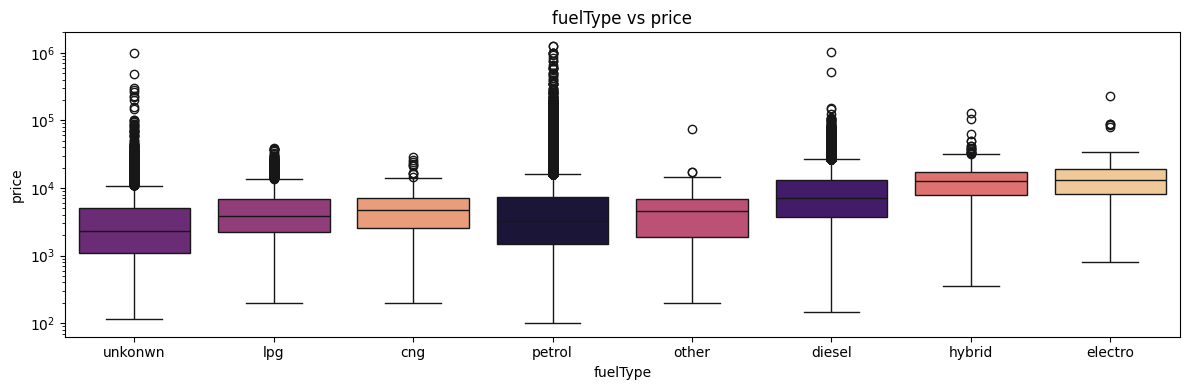

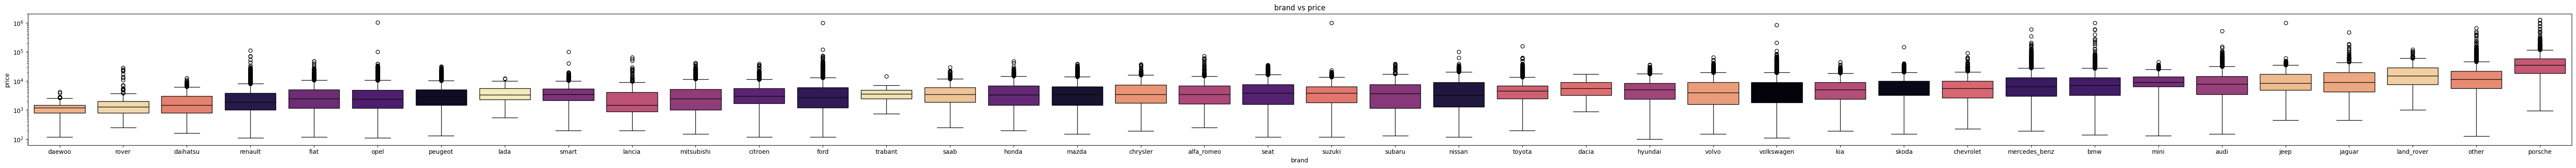

In [24]:
# Definir la variable objetivo
columna1 = 'price'

# Generar gráficos independientes para cada variable categórica
for col in cat_cols:

    if col == 'name':
        continue
    
    # Calcular el número de categorías únicas
    num_cats = df[col].nunique()

    # Ajustar dinámicamente el tamaño del gráfico
    fig_width = max(4, num_cats * 1.5)
    fig_height = 4

    # Ordenar las categorías por el promedio de la variable objetivo
    ordered_cats = df.groupby(col)[columna1].mean().sort_values().index

    plt.figure(figsize=(fig_width, fig_height))
    sns.boxplot(x=df[col], y=df[columna1], hue=df[col], data=df, order=ordered_cats, palette="magma", legend=False)
    
    plt.title(f"{col} vs {columna1}")
    plt.xlabel(col)
    plt.ylabel(columna1)
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

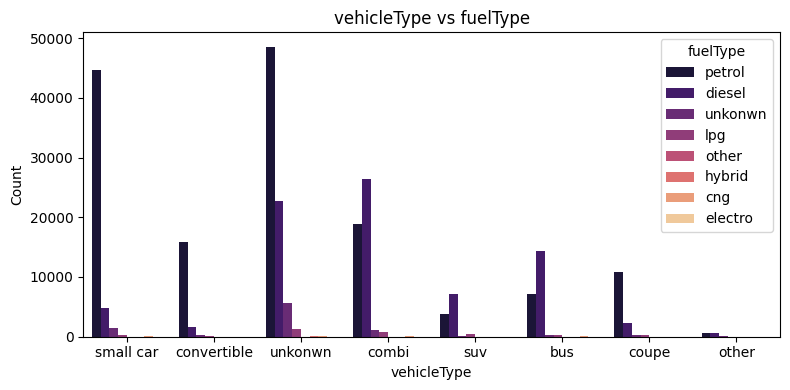

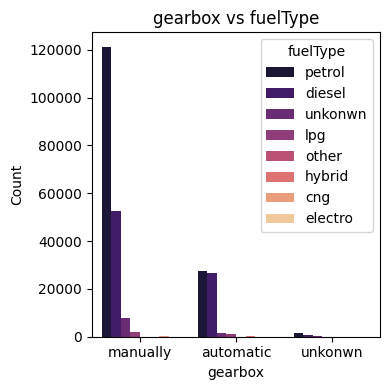

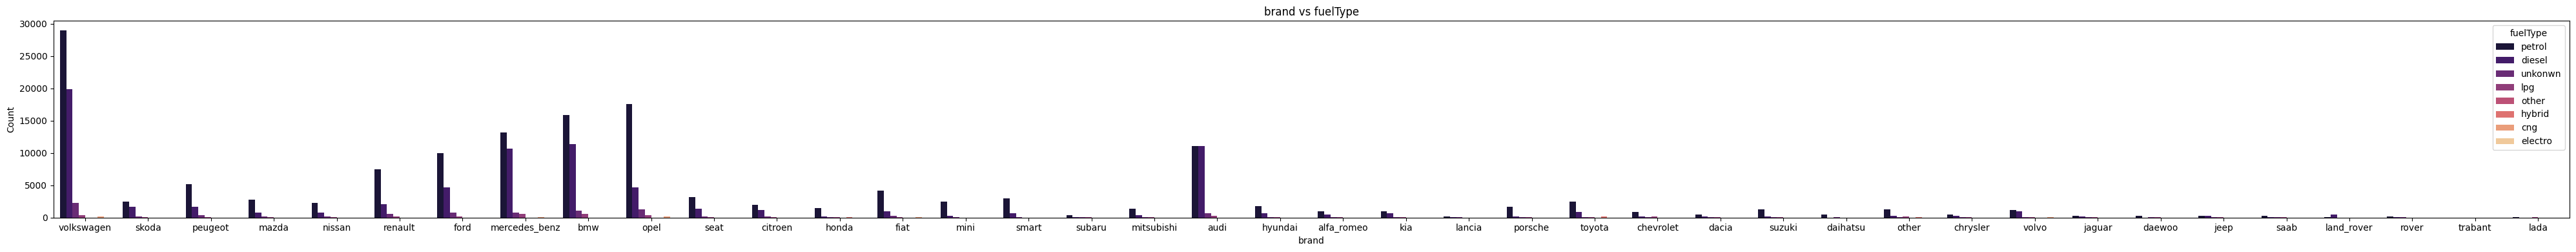

In [33]:
# Definir la variable objetivo
columna1 = 'fuelType'

for col in cat_cols:

    if col == columna1 or col == 'name':
        continue

    num_cats = df[col].nunique()

    # Ajustar dinámicamente el tamaño del gráfico
    fig_width = max(4, num_cats)
    fig_height = 4

    plt.figure(figsize=(fig_width, fig_height))

    sns.countplot(data=df, x=col, hue=columna1, palette="magma")

    plt.title(f"{col} vs {columna1}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()